In [1]:
# Kernel Density Estimation

In [2]:
# GMM are a kind of hybrid between a clustering estimator and a density estimator

In [3]:
# A density estimator is an algorithm that takes a D-dimensional dataset and produces an estimate
# of the d-dimensional probabilty distribution which that data is drawn from

In [4]:
# The GMM algorithm accomplishes this by representing the density as a weighted sum of gaussian
# distributions

In [5]:
# Kernel Density Estimation is in some ways an algorithm that takes the mixture of Gaussian idea to its
# logical extreme: it uses a mixture consisting of one Gaussian component per point
# resulting in an essentially non parametric estimator of density.
# In this section  we will explore the motivation and uses of KDE

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()
import numpy as np

In [7]:
# A density estimator is an algorithm that seeks to model the probabilty distribution that
# generated a dataset. A histogram divides the data into discrete bins
# counts the number of points that fall in each bin, and then visualizes the results in an intuitive manner

In [8]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f*N):] += 5
    return x

In [9]:
x = make_data(1000)

In [10]:
# By specifying the density parameter of the histogram we end up with normalized histogram
# where the height of the bins does not reflect counts, but instead reflects probabulty density

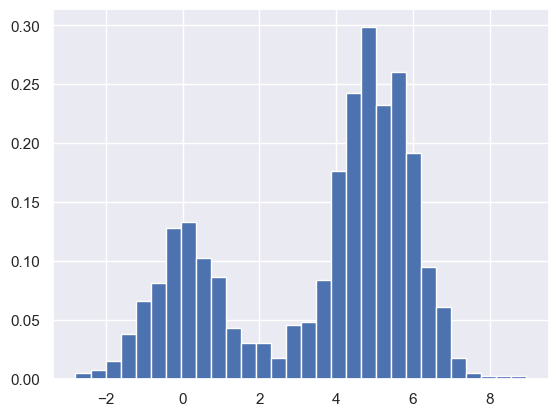

In [11]:
hist = plt.hist(x, bins=30, density=True)

In [12]:
# The normalization is chosen so that the total area under the histogram remains 1

In [13]:
# Lets confirm that area is 1
density, bins, patches = hist
widths = bins[1:] - bins[:-1]
(density*widths).sum()

1.0

In [14]:
# One issue with using a histogram as a density estimator is that the choice of bin size
# and location can lead to represntations that have qualitatively different features

In [15]:
x = make_data(20)
bins = np.linspace(-5, 10, 10)

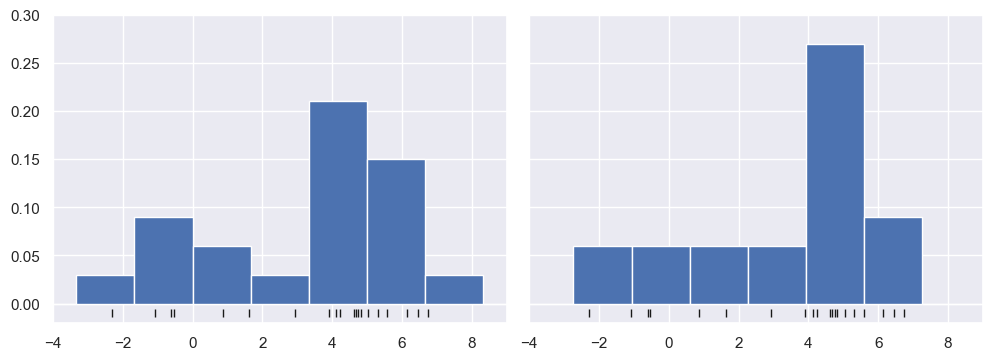

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True, 
                       subplot_kw={'xlim':(-4, 9), 'ylim':(-0.02, 0.3)})
fig.subplots_adjust(wspace=0.05)

for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins+offset, density=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)

In [17]:
# Fig shows the problem with histograms: the location of the bins can affect interpretation

In [18]:
# We can think of a histogram as a stack of blocks, where we stack one block within each bin
# on top of each point in the dataset

(-0.02, 8.0)

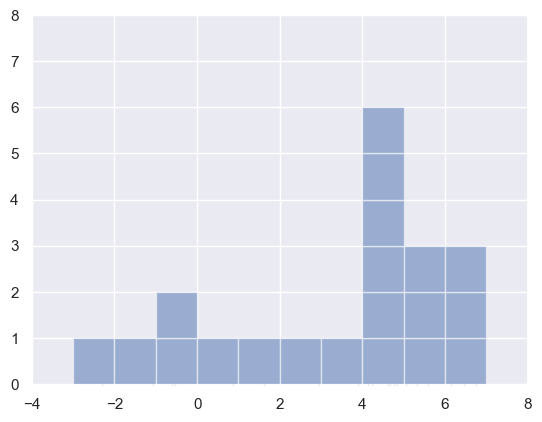

In [19]:
fig, ax = plt.subplots()
bins = np.arange(-3, 8)
ax.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
for count, edge in zip(*np.histogram(x, bins)):
    for i in range(count):
        ax.add_patch(plt.Rectangle((edge, i), 1, 1, alpha=0.5))
ax.set_xlim(-4, 8)
ax.set_ylim(-.02, 8)

In [20]:
# The problem with our two binning stems from the fact that the height of the block stack often
# reflects not on the actual density of points nearby, but on coincidences of how the bins align
# with the data points. This misalignment between points and their blocks is a potential
# cause of the poor histogram results seen here.

In [21]:
# But instead of stacking the blocks alogned with the bins, we were to stack the blocks aligned with
# the points they represent

In [22]:
x_d = np.linspace(-4, 8, 2000)
density = sum((abs(xi - x_d) < 0.5) for xi in x)

(-4.0, 8.0, -0.2, 8.0)

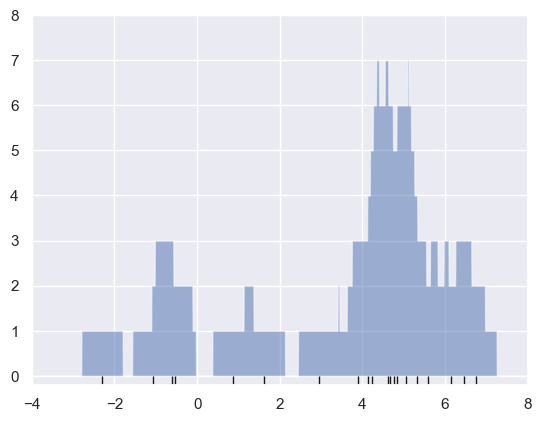

In [23]:
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 8])

In [24]:
# Fig: A histogram where blocks center on each individual point; this is an example of
# kernel density estimate

In [25]:
from scipy.stats import norm
x_d = np.linspace(-4, 8, 1000)
density = sum(norm(xi).pdf(x_d) for xi in x)

(-4.0, 8.0, -0.2, 5.0)

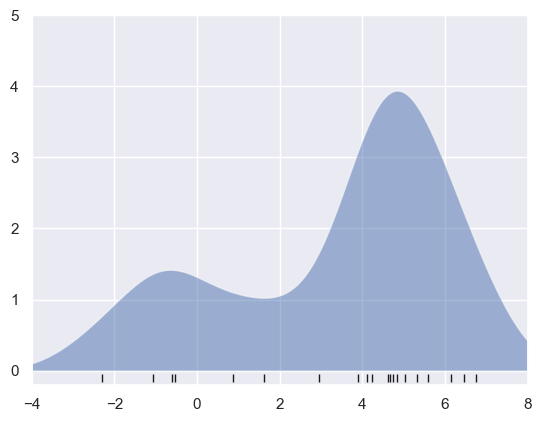

In [26]:
plt.fill_between(x_d, density, alpha=0.5)
plt.plot(x, np.full_like(x, -0.1), '|k', markeredgewidth=1)
plt.axis([-4, 8, -0.2, 5])

In [27]:
# This smoothed-out plot with a gaussian distribution contributed at the location of each input point
# gives a much more accurate idea of the shape of data distribution and one that has much less variance

In [28]:
# KERNEL DENSITY ESTIMATE IN PRACTICE

(-0.02, 0.22)

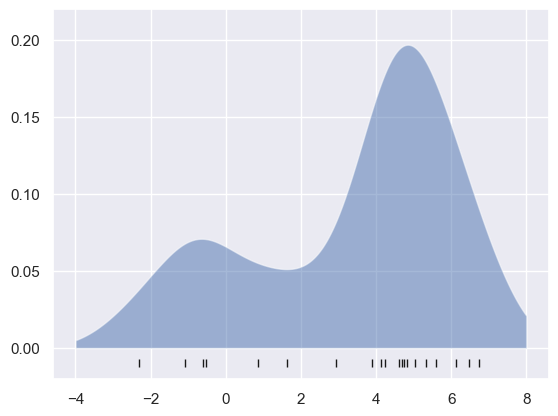

In [29]:
from sklearn.neighbors import KernelDensity

# instatitiate and fit the kde model
kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(x[:, None])

# score_samples returns the log of the probability density
logprob = kde.score_samples(x_d[:, None])

plt.fill_between(x_d, np.exp(logprob), alpha=0.5)
plt.plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
plt.ylim(-0.02, 0.22)

In [30]:
# Kde , the result is normalized such that the area under the curve is equal to 1

In [31]:
# Selecting bandwidth via corss-validation

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut

In [33]:
bandwidths = 10 ** np.linspace(-1, 1, 100)
cv=LeaveOneOut()
grid = GridSearchCV(KernelDensity(kernel='gaussian'), {'bandwidth': bandwidths}, cv=cv)
grid.fit(x[:, None])

GridSearchCV(cv=LeaveOneOut(), estimator=KernelDensity(),
             param_grid={'bandwidth': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.27825594,  0.29150531,  0.305385...
        2.05651231,  2.15443469,  2.25701972,  2.36448941,  2.47707636,
        2.59502421,  2.71858824,  2.84803587,  2.98364724,  3.12571585,
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ])})

In [34]:
# now we can find choice of bandwidth that maximizes the score

In [35]:
grid.best_params_

{'bandwidth': 1.1233240329780276}

In [36]:
# KDE on a sphere

In [37]:
from sklearn.datasets import fetch_species_distributions
data = fetch_species_distributions()

In [38]:
# Get matrices/arrays of species IDs and locations

In [39]:
latlon=np.vstack([data.train['dd lat'], data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro') for d in data.train['species']], dtype='int')

In [40]:
location = np.vstack([data.train['dd lat'], data.train['dd long']]).T
species = np.array([d.decode('ascii').startswith('micro') for d in data.train['species']], dtype=int)


In [41]:
# We can use basemap toolkit to plot the observed loccations of these species

In [49]:
import cartopy.crs as ccrs

ImportError: DLL load failed while importing lib: Not enough memory resources are available to process this command.